## Final Project Submission
Student name: Heather McLauren 

Student pace: full time

Scheduled project review date/time: 

Instructor name: Rafael Carrasco

Blog post URL:

## Introduction

For this project, I wanted to predict housing prices in King County, which is located in Seattle, Washington. I will be using Multiple Linear Regression modeling to help analyse my data and create a machine learning predictor to help predict the housing prices in the area. I wanted to take a closer look at the correlation of price compared to the condition, zipcode, and year built features. 

Linear Regression is the modeling technique used to estimate the strength and direction of the relationship between two (or more) variables. You will use an dependent variable, also called the target variable, and independent variables, which are also called features or predictors. Linear Regression uses only one independent and one dependent variable to determine the correlation between the two and Multiple Linear Regression uses multiple independent variables and one dependent variable. Regression is a parametric technique, which means that it uses parameters learned from the data and it is the beginning concept of machine learning. Some assumptions that have to be made when conducting a linear regression model is that the data has to possess:
1. Linearity
2. Multicollinearity
3. Normality
4. Homoscedasticity


I will be going through all of these steps in my analysis to help me create my price predictor model. Once I complete my modeling, I will also be interpreting R2 and skewness to determine how linear and normal my data actually is. The  𝑅2  or coefficient of determination is a statistical measure that is used to assess the goodness of fit of a regression model. Not every distribution of data is symmetric. Sets of data that are not symmetric are considered to be asymmetric. The measure of how asymmetric a distribution can be is called skewness.


When it comes to the Data Science Process of Linear Regression, you want to follow the OSEMN Model to ensure you have a well developed analysis. This process should be taken to ensure that you have a complete, thorough analysis. The steps that you want to take when handling your data is the following:

1. Obtain
2. Scrub
3. Explore
4. Model
5. Interpret


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn import linear_model

import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('housing_dataset_cleaned (1).csv')
df

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0       538000         3       2.25         2570      7242     2.0   
1       604000         4       3.00         1960      5000     1.0   
2       510000         3       2.00         1680      8080     1.0   
3      1230000         4       4.50         5420    101930     1.0   
4       257500         3       2.25         1715      6819     2.0   
...        ...       ...        ...          ...       ...     ...   
15715   475000         3       2.50         1310      1294     2.0   
15716   360000         3       2.50         1530      1131     3.0   
15717   400000         4       2.50         2310      5813     2.0   
15718   402101         2       0.75         1020      1350     2.0   
15719   325000         2       0.75         1020      1076     2.0   

       waterfront  view  condition  grade  sqft_above sqft_basement  yr_built  \
0               0     0          3      7        2170           400      1951   
1               0     0          5      7        1050           910      1965   
2               0     0          3      8        1680             0      1987   
3               0     0          3     11        3890          1530      2001   
4               0     0          3      7        1715             ?      1995   
...           ...   ...        ...    ...         ...           ...       ...   
15715           0     0          3      8        1180           130      2008   
15716           0     0          3      8        1530             0      2009   
15717           0     0          3      8        2310             0      2014   
15718           0     0          3      7        1020             0      2009   
15719           0     0          3      7        1020             0      2008   

       yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  
0              1991    98125  47.7210 -122.319           1690        7639  
1                 0    98136  47.5208 -122.393           1360        5000  
2                 0    98074  47.6168 -122.045           1800        7503  
3                 0    98053  47.6561 -122.005           4760      101930  
4                 0    98003  47.3097 -122.327           2238        6819  
...             ...      ...      ...      ...            ...         ...  
15715             0    98116  47.5773 -122.409           1330        1265  
15716             0    98103  47.6993 -122.346           1530        1509  
15717             0    98146  47.5107 -122.362           1830        7200  
15718             0    98144  47.5944 -122.299           1020        2007  
15719             0    98144  47.5941 -122.299           1020        1357  

[15720 rows x 19 columns]

## Cleaning Data and Removing Outliers

I first imported my dataframe using pandas and I want to do some final cleaning and removing of my outliers before I start my EDA.

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15720 entries, 0 to 15719
Data columns (total 19 columns):
price            15720 non-null int64
bedrooms         15720 non-null int64
bathrooms        15720 non-null float64
sqft_living      15720 non-null int64
sqft_lot         15720 non-null int64
floors           15720 non-null float64
waterfront       15720 non-null int64
view             15720 non-null int64
condition        15720 non-null int64
grade            15720 non-null int64
sqft_above       15720 non-null int64
sqft_basement    15720 non-null object
yr_built         15720 non-null int64
yr_renovated     15720 non-null int64
zipcode          15720 non-null int64
lat              15720 non-null float64
long             15720 non-null float64
sqft_living15    15720 non-null int64
sqft_lot15       15720 non-null int64
dtypes: float64(4), int64(14), object(1)
memory usage: 2.3+ MB


The data was already pretty clean with this particular dataframe version and has no NaN values.

In [3]:
df.isna().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

Next I decided that I wanted to drop a few columns because I did not need them for my analysis and the data provided was very little in those columns.

In [4]:
df2 = df.drop(['sqft_basement'], axis=1)
df2

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0       538000         3       2.25         2570      7242     2.0   
1       604000         4       3.00         1960      5000     1.0   
2       510000         3       2.00         1680      8080     1.0   
3      1230000         4       4.50         5420    101930     1.0   
4       257500         3       2.25         1715      6819     2.0   
...        ...       ...        ...          ...       ...     ...   
15715   475000         3       2.50         1310      1294     2.0   
15716   360000         3       2.50         1530      1131     3.0   
15717   400000         4       2.50         2310      5813     2.0   
15718   402101         2       0.75         1020      1350     2.0   
15719   325000         2       0.75         1020      1076     2.0   

       waterfront  view  condition  grade  sqft_above  yr_built  yr_renovated  \
0               0     0          3      7        2170      1951          1991   
1               0     0          5      7        1050      1965             0   
2               0     0          3      8        1680      1987             0   
3               0     0          3     11        3890      2001             0   
4               0     0          3      7        1715      1995             0   
...           ...   ...        ...    ...         ...       ...           ...   
15715           0     0          3      8        1180      2008             0   
15716           0     0          3      8        1530      2009             0   
15717           0     0          3      8        2310      2014             0   
15718           0     0          3      7        1020      2009             0   
15719           0     0          3      7        1020      2008             0   

       zipcode      lat     long  sqft_living15  sqft_lot15  
0        98125  47.7210 -122.319           1690        7639  
1        98136  47.5208 -122.393           1360        5000  
2        98074  47.6168 -122.045           1800        7503  
3        98053  47.6561 -122.005           4760      101930  
4        98003  47.3097 -122.327           2238        6819  
...        ...      ...      ...            ...         ...  
15715    98116  47.5773 -122.409           1330        1265  
15716    98103  47.6993 -122.346           1530        1509  
15717    98146  47.5107 -122.362           1830        7200  
15718    98144  47.5944 -122.299           1020        2007  
15719    98144  47.5941 -122.299           1020        1357  

[15720 rows x 18 columns]

In [5]:
df3 = df2.drop(['view'], axis=1)
df3

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0       538000         3       2.25         2570      7242     2.0   
1       604000         4       3.00         1960      5000     1.0   
2       510000         3       2.00         1680      8080     1.0   
3      1230000         4       4.50         5420    101930     1.0   
4       257500         3       2.25         1715      6819     2.0   
...        ...       ...        ...          ...       ...     ...   
15715   475000         3       2.50         1310      1294     2.0   
15716   360000         3       2.50         1530      1131     3.0   
15717   400000         4       2.50         2310      5813     2.0   
15718   402101         2       0.75         1020      1350     2.0   
15719   325000         2       0.75         1020      1076     2.0   

       waterfront  condition  grade  sqft_above  yr_built  yr_renovated  \
0               0          3      7        2170      1951          1991   
1               0          5      7        1050      1965             0   
2               0          3      8        1680      1987             0   
3               0          3     11        3890      2001             0   
4               0          3      7        1715      1995             0   
...           ...        ...    ...         ...       ...           ...   
15715           0          3      8        1180      2008             0   
15716           0          3      8        1530      2009             0   
15717           0          3      8        2310      2014             0   
15718           0          3      7        1020      2009             0   
15719           0          3      7        1020      2008             0   

       zipcode      lat     long  sqft_living15  sqft_lot15  
0        98125  47.7210 -122.319           1690        7639  
1        98136  47.5208 -122.393           1360        5000  
2        98074  47.6168 -122.045           1800        7503  
3        98053  47.6561 -122.005           4760      101930  
4        98003  47.3097 -122.327           2238        6819  
...        ...      ...      ...            ...         ...  
15715    98116  47.5773 -122.409           1330        1265  
15716    98103  47.6993 -122.346           1530        1509  
15717    98146  47.5107 -122.362           1830        7200  
15718    98144  47.5944 -122.299           1020        2007  
15719    98144  47.5941 -122.299           1020        1357  

[15720 rows x 17 columns]

In [6]:
df4 = df3.drop(['waterfront'], axis=1)
df4

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  condition  \
0       538000         3       2.25         2570      7242     2.0          3   
1       604000         4       3.00         1960      5000     1.0          5   
2       510000         3       2.00         1680      8080     1.0          3   
3      1230000         4       4.50         5420    101930     1.0          3   
4       257500         3       2.25         1715      6819     2.0          3   
...        ...       ...        ...          ...       ...     ...        ...   
15715   475000         3       2.50         1310      1294     2.0          3   
15716   360000         3       2.50         1530      1131     3.0          3   
15717   400000         4       2.50         2310      5813     2.0          3   
15718   402101         2       0.75         1020      1350     2.0          3   
15719   325000         2       0.75         1020      1076     2.0          3   

       grade  sqft_above  yr_built  yr_renovated  zipcode      lat     long  \
0          7        2170      1951          1991    98125  47.7210 -122.319   
1          7        1050      1965             0    98136  47.5208 -122.393   
2          8        1680      1987             0    98074  47.6168 -122.045   
3         11        3890      2001             0    98053  47.6561 -122.005   
4          7        1715      1995             0    98003  47.3097 -122.327   
...      ...         ...       ...           ...      ...      ...      ...   
15715      8        1180      2008             0    98116  47.5773 -122.409   
15716      8        1530      2009             0    98103  47.6993 -122.346   
15717      8        2310      2014             0    98146  47.5107 -122.362   
15718      7        1020      2009             0    98144  47.5944 -122.299   
15719      7        1020      2008             0    98144  47.5941 -122.299   

       sqft_living15  sqft_lot15  
0               1690        7639  
1               1360        5000  
2               1800        7503  
3               4760      101930  
4               2238        6819  
...              ...         ...  
15715           1330        1265  
15716           1530        1509  
15717           1830        7200  
15718           1020        2007  
15719           1020        1357  

[15720 rows x 16 columns]

In [7]:
df4.describe().round(2)

price  bedrooms  bathrooms  sqft_living    sqft_lot    floors  \
count    15720.00  15720.00   15720.00     15720.00    15720.00  15720.00   
mean    532514.72      3.38       2.11      2073.74    15258.83      1.49   
std     326574.48      0.93       0.76       890.99    41871.31      0.54   
min      82000.00      1.00       0.50       370.00      520.00      1.00   
25%     320000.00      3.00       1.75      1430.00     5040.00      1.00   
50%     450000.00      3.00       2.25      1920.00     7590.00      1.50   
75%     640000.00      4.00       2.50      2550.00    10656.25      2.00   
max    2980000.00     33.00       8.00     13540.00  1651359.00      3.50   

       condition     grade  sqft_above  yr_built  yr_renovated   zipcode  \
count   15720.00  15720.00    15720.00  15720.00      15720.00  15720.00   
mean        3.41      7.65     1784.95   1971.09         81.64  98077.63   
std         0.65      1.16      811.79     29.32        395.36     53.41   
min         1.00      3.00      370.00   1900.00          0.00  98001.00   
25%         3.00      7.00     1200.00   1952.00          0.00  98033.00   
50%         3.00      7.00     1560.00   1975.00          0.00  98065.00   
75%         4.00      8.00     2210.00   1997.00          0.00  98117.00   
max         5.00     13.00     9410.00   2015.00       2015.00  98199.00   

            lat      long  sqft_living15  sqft_lot15  
count  15720.00  15720.00       15720.00    15720.00  
mean      47.56   -122.21        1985.70    12882.86  
std        0.14      0.14         678.68    28006.92  
min       47.16   -122.52         399.00      659.00  
25%       47.47   -122.33        1490.00     5100.00  
50%       47.57   -122.23        1840.00     7620.00  
75%       47.68   -122.12        2360.00    10084.50  
max       47.78   -121.32        6210.00   871200.00

Now I am going to remove duplicate rows in my dataframe to ensure I get the most accurate findings possible.

In [8]:
df4[df4.duplicated(keep=False)].sort_values(by='price')
df_housing2 = df4.drop_duplicates()
print(df_housing2)

         price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  condition  \
0       538000         3       2.25         2570      7242     2.0          3   
1       604000         4       3.00         1960      5000     1.0          5   
2       510000         3       2.00         1680      8080     1.0          3   
3      1230000         4       4.50         5420    101930     1.0          3   
4       257500         3       2.25         1715      6819     2.0          3   
...        ...       ...        ...          ...       ...     ...        ...   
15715   475000         3       2.50         1310      1294     2.0          3   
15716   360000         3       2.50         1530      1131     3.0          3   
15717   400000         4       2.50         2310      5813     2.0          3   
15718   402101         2       0.75         1020      1350     2.0          3   
15719   325000         2       0.75         1020      1076     2.0          3   

       grade  sqft_above  y

In [9]:
df_housing2

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  condition  \
0       538000         3       2.25         2570      7242     2.0          3   
1       604000         4       3.00         1960      5000     1.0          5   
2       510000         3       2.00         1680      8080     1.0          3   
3      1230000         4       4.50         5420    101930     1.0          3   
4       257500         3       2.25         1715      6819     2.0          3   
...        ...       ...        ...          ...       ...     ...        ...   
15715   475000         3       2.50         1310      1294     2.0          3   
15716   360000         3       2.50         1530      1131     3.0          3   
15717   400000         4       2.50         2310      5813     2.0          3   
15718   402101         2       0.75         1020      1350     2.0          3   
15719   325000         2       0.75         1020      1076     2.0          3   

       grade  sqft_above  yr_built  yr_renovated  zipcode      lat     long  \
0          7        2170      1951          1991    98125  47.7210 -122.319   
1          7        1050      1965             0    98136  47.5208 -122.393   
2          8        1680      1987             0    98074  47.6168 -122.045   
3         11        3890      2001             0    98053  47.6561 -122.005   
4          7        1715      1995             0    98003  47.3097 -122.327   
...      ...         ...       ...           ...      ...      ...      ...   
15715      8        1180      2008             0    98116  47.5773 -122.409   
15716      8        1530      2009             0    98103  47.6993 -122.346   
15717      8        2310      2014             0    98146  47.5107 -122.362   
15718      7        1020      2009             0    98144  47.5944 -122.299   
15719      7        1020      2008             0    98144  47.5941 -122.299   

       sqft_living15  sqft_lot15  
0               1690        7639  
1               1360        5000  
2               1800        7503  
3               4760      101930  
4               2238        6819  
...              ...         ...  
15715           1330        1265  
15716           1530        1509  
15717           1830        7200  
15718           1020        2007  
15719           1020        1357  

[15716 rows x 16 columns]

In [10]:
df_housing2.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'condition', 'grade', 'sqft_above', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

Now that I have completed my cleaning of the dataframe, I want to remove all appropriate outliers from my data. I decide to do this by finding the IQR of my columns and removing any values that falls out of the .25 and .75 quantile to create a more normal distribution of my data.

In [11]:
Q1 = df_housing2.quantile(0.25)
Q3 = df_housing2.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

price            320000.0000
bedrooms              1.0000
bathrooms             0.7500
sqft_living        1120.0000
sqft_lot           5620.0000
floors                1.0000
condition             1.0000
grade                 1.0000
sqft_above         1010.0000
yr_built             45.0000
yr_renovated          0.0000
zipcode              84.0000
lat                   0.2088
long                  0.2040
sqft_living15       870.0000
sqft_lot15         4986.2500
dtype: float64


In [12]:
housing_df_out = df_housing2[~((df_housing2 < (Q1 - 1.5 * IQR)) |(df_housing2 > (Q3 + 1.5 * IQR))).any(axis=1)]
housing_df_out.shape

(11669, 16)

This is the final dataframe I will be using to complete my linear regression modeling to predict housing prices.

In [13]:
housing_df_out

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  condition  \
1      604000         4       3.00         1960      5000     1.0          5   
2      510000         3       2.00         1680      8080     1.0          3   
4      257500         3       2.25         1715      6819     2.0          3   
5      229500         3       1.00         1780      7470     1.0          3   
6      323000         3       2.50         1890      6560     2.0          3   
...       ...       ...        ...          ...       ...     ...        ...   
15715  475000         3       2.50         1310      1294     2.0          3   
15716  360000         3       2.50         1530      1131     3.0          3   
15717  400000         4       2.50         2310      5813     2.0          3   
15718  402101         2       0.75         1020      1350     2.0          3   
15719  325000         2       0.75         1020      1076     2.0          3   

       grade  sqft_above  yr_built  yr_renovated  zipcode      lat     long  \
1          7        1050      1965             0    98136  47.5208 -122.393   
2          8        1680      1987             0    98074  47.6168 -122.045   
4          7        1715      1995             0    98003  47.3097 -122.327   
5          7        1050      1960             0    98146  47.5123 -122.337   
6          7        1890      2003             0    98038  47.3684 -122.031   
...      ...         ...       ...           ...      ...      ...      ...   
15715      8        1180      2008             0    98116  47.5773 -122.409   
15716      8        1530      2009             0    98103  47.6993 -122.346   
15717      8        2310      2014             0    98146  47.5107 -122.362   
15718      7        1020      2009             0    98144  47.5944 -122.299   
15719      7        1020      2008             0    98144  47.5941 -122.299   

       sqft_living15  sqft_lot15  
1               1360        5000  
2               1800        7503  
4               2238        6819  
5               1780        8113  
6               2390        7570  
...              ...         ...  
15715           1330        1265  
15716           1530        1509  
15717           1830        7200  
15718           1020        2007  
15719           1020        1357  

[11669 rows x 16 columns]

In [14]:
housing_df_out.describe().round(2)

price  bedrooms  bathrooms  sqft_living  sqft_lot    floors  \
count    11669.00  11669.00   11669.00     11669.00  11669.00  11669.00   
mean    450789.24      3.28       1.99      1849.24   7048.85      1.46   
std     187666.84      0.78       0.65       633.07   3381.72      0.54   
min      82000.00      2.00       0.75       560.00    520.00      1.00   
25%     305000.00      3.00       1.50      1370.00   4777.00      1.00   
50%     417000.00      3.00       2.00      1780.00   7050.00      1.00   
75%     560000.00      4.00       2.50      2260.00   8990.00      2.00   
max    1120000.00      5.00       3.50      4170.00  19080.00      3.50   

       condition     grade  sqft_above  yr_built  yr_renovated   zipcode  \
count   11669.00  11669.00    11669.00   11669.0       11669.0  11669.00   
mean        3.43      7.41     1592.46    1971.1           0.0  98081.09   
std         0.65      0.81      597.15      29.2           0.0     54.17   
min         2.00      6.00      480.00    1900.0           0.0  98001.00   
25%         3.00      7.00     1150.00    1952.0           0.0  98033.00   
50%         3.00      7.00     1450.00    1973.0           0.0  98074.00   
75%         4.00      8.00     1920.00    1998.0           0.0  98119.00   
max         5.00      9.00     3720.00    2015.0           0.0  98199.00   

            lat      long  sqft_living15  sqft_lot15  
count  11669.00  11669.00       11669.00    11669.00  
mean      47.56   -122.23        1825.30     6925.38  
std        0.14      0.12         516.47     3004.39  
min       47.18   -122.50         620.00      659.00  
25%       47.46   -122.34        1440.00     4838.00  
50%       47.57   -122.27        1740.00     7180.00  
75%       47.68   -122.16        2140.00     8712.00  
max       47.78   -121.82        3640.00    17550.00

I want to save this new dataframe as a csv file so I can retrive it later on with out having to re-clean it.

In [15]:
housing_df_out.to_csv("housing_final.csv", index=False)

## Exploratory Data Analysis (EDA)
Now that I have my dataframe ready, I want to start analysing my data to get more comfortable and acquainted with it. This is a very important part of data analysis and should always been done before you start modeling.

In [16]:
housing_df = pd.read_csv('housing_final.csv')
housing_df

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  condition  \
0      604000         4       3.00         1960      5000     1.0          5   
1      510000         3       2.00         1680      8080     1.0          3   
2      257500         3       2.25         1715      6819     2.0          3   
3      229500         3       1.00         1780      7470     1.0          3   
4      323000         3       2.50         1890      6560     2.0          3   
...       ...       ...        ...          ...       ...     ...        ...   
11664  475000         3       2.50         1310      1294     2.0          3   
11665  360000         3       2.50         1530      1131     3.0          3   
11666  400000         4       2.50         2310      5813     2.0          3   
11667  402101         2       0.75         1020      1350     2.0          3   
11668  325000         2       0.75         1020      1076     2.0          3   

       grade  sqft_above  yr_built  yr_renovated  zipcode      lat     long  \
0          7        1050      1965             0    98136  47.5208 -122.393   
1          8        1680      1987             0    98074  47.6168 -122.045   
2          7        1715      1995             0    98003  47.3097 -122.327   
3          7        1050      1960             0    98146  47.5123 -122.337   
4          7        1890      2003             0    98038  47.3684 -122.031   
...      ...         ...       ...           ...      ...      ...      ...   
11664      8        1180      2008             0    98116  47.5773 -122.409   
11665      8        1530      2009             0    98103  47.6993 -122.346   
11666      8        2310      2014             0    98146  47.5107 -122.362   
11667      7        1020      2009             0    98144  47.5944 -122.299   
11668      7        1020      2008             0    98144  47.5941 -122.299   

       sqft_living15  sqft_lot15  
0               1360        5000  
1               1800        7503  
2               2238        6819  
3               1780        8113  
4               2390        7570  
...              ...         ...  
11664           1330        1265  
11665           1530        1509  
11666           1830        7200  
11667           1020        2007  
11668           1020        1357  

[11669 rows x 16 columns]

In [17]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11669 entries, 0 to 11668
Data columns (total 16 columns):
price            11669 non-null int64
bedrooms         11669 non-null int64
bathrooms        11669 non-null float64
sqft_living      11669 non-null int64
sqft_lot         11669 non-null int64
floors           11669 non-null float64
condition        11669 non-null int64
grade            11669 non-null int64
sqft_above       11669 non-null int64
yr_built         11669 non-null int64
yr_renovated     11669 non-null int64
zipcode          11669 non-null int64
lat              11669 non-null float64
long             11669 non-null float64
sqft_living15    11669 non-null int64
sqft_lot15       11669 non-null int64
dtypes: float64(4), int64(12)
memory usage: 1.4 MB


In [18]:
#housing_df['price'] = housing_df['price'].astype(int).astype(float)

#housing_df.price.dtype

When you start the EDA process, you want to see how normal the distribution of your features are and you also want to determine which features are categorical and continuous. You can determine this visually by creating subplots and histograms. A cool way to determine which features are categorical is to look at any plots with vertical lines. Vertical lines is an indication of a categorical correlation. 

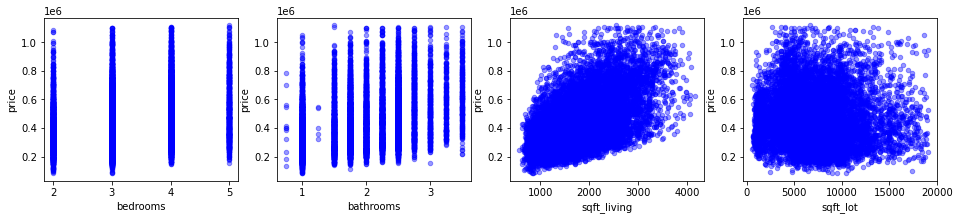

In [19]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,3))

for xcol, ax in zip(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot'], axes):
    housing_df.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

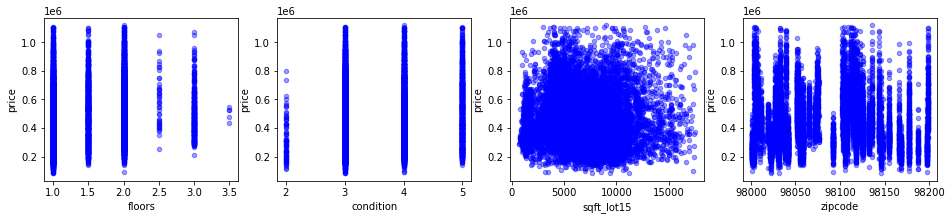

In [20]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,3))

for xcol, ax in zip(['floors', 'condition', 'sqft_lot15', 'zipcode'], axes):
    housing_df.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

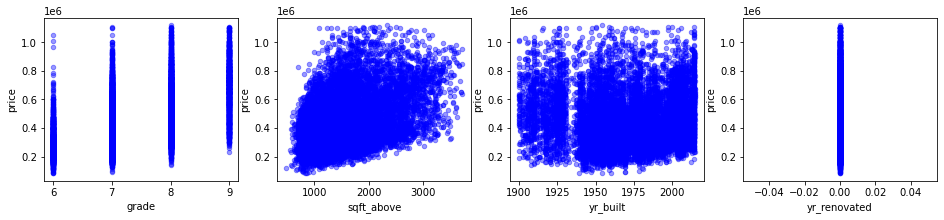

In [21]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,3))

for xcol, ax in zip(['grade', 'sqft_above', 'yr_built', 'yr_renovated'], axes):
    housing_df.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

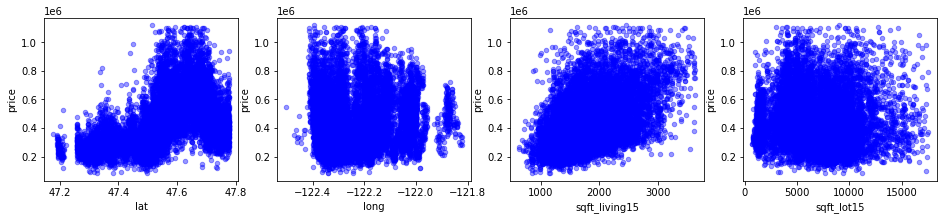

In [22]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,3))

for xcol, ax in zip(['lat', 'long', 'sqft_living15', 'sqft_lot15'], axes):
    housing_df.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002AF865E7DD8>,
      dtype=object)

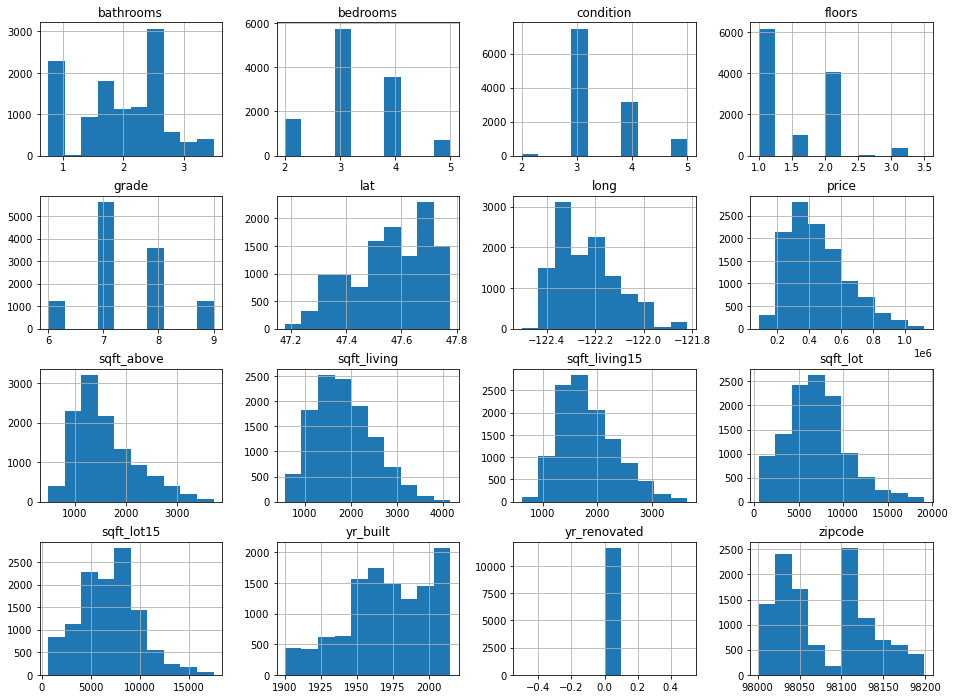

In [23]:
housing_df.hist(figsize=(16,12))

Another way to determine if a feature is categorical is to find the number of unique values of each one. The features with smaller values is an indication of being categorical as well. 

In [24]:
housing_df.nunique()

price            2472
bedrooms            4
bathrooms          12
sqft_living       601
sqft_lot         5601
floors              6
condition           4
grade               4
sqft_above        576
yr_built          116
yr_renovated        1
zipcode            69
lat              4311
long              542
sqft_living15     514
sqft_lot15       4959
dtype: int64

## Check for Multicollinearity
Multicollinearity is when one predictor is correlated with another predictor. This causes a problem because not only is your independent variable responsive to other variables, the other variables are responsive to each other as well. This can make your regression analysis harder to interpret because there are too many factors that are correlated with each other and your independent variable becomes not that independent anymore. 

I am going to check for features that are correlated to price and then I'm going to check for correlations between the features themselves without price to see if any of them are reactant to each other and remove the features that are correlated to each other so I can isolate the features that are truely correlated to price.

1. Checking for multicollinearity between price and it's features.

In [25]:
feats = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 
         'condition', 'grade', 'sqft_above', 'yr_built', 'zipcode', 
         'lat', 'long', 'sqft_living15', 'sqft_lot15']
corr = housing_df[feats].corr()
corr

price  bedrooms  bathrooms  sqft_living  sqft_lot    floors  \
price          1.000000  0.243726   0.343146     0.529955 -0.054753  0.207662   
bedrooms       0.243726  1.000000   0.453008     0.616470  0.210889  0.119970   
bathrooms      0.343146  0.453008   1.000000     0.669293 -0.061998  0.503945   
sqft_living    0.529955  0.616470   0.669293     1.000000  0.190936  0.287787   
sqft_lot      -0.054753  0.210889  -0.061998     0.190936  1.000000 -0.409277   
floors         0.207662  0.119970   0.503945     0.287787 -0.409277  1.000000   
condition      0.094748  0.022691  -0.150048    -0.053345  0.144755 -0.294635   
grade          0.535371  0.299253   0.578764     0.628802 -0.001173  0.449765   
sqft_above     0.402315  0.477979   0.586527     0.807693  0.120304  0.519390   
yr_built      -0.032503  0.156829   0.586336     0.328599 -0.093115  0.539520   
zipcode        0.012115 -0.173961  -0.232211    -0.209233 -0.244479 -0.065023   
lat            0.475261 -0.079850  -0.052932    -0.024487 -0.149191  0.018139   
long           0.023415  0.180929   0.285168     0.283166  0.208497  0.148105   
sqft_living15  0.471993  0.414216   0.508501     0.723701  0.226175  0.225622   
sqft_lot15    -0.062610  0.200019  -0.064012     0.174761  0.875903 -0.415845   

               condition     grade  sqft_above  yr_built   zipcode       lat  \
price           0.094748  0.535371    0.402315 -0.032503  0.012115  0.475261   
bedrooms        0.022691  0.299253    0.477979  0.156829 -0.173961 -0.079850   
bathrooms      -0.150048  0.578764    0.586527  0.586336 -0.232211 -0.052932   
sqft_living    -0.053345  0.628802    0.807693  0.328599 -0.209233 -0.024487   
sqft_lot        0.144755 -0.001173    0.120304 -0.093115 -0.244479 -0.149191   
floors         -0.294635  0.449765    0.519390  0.539520 -0.065023  0.018139   
condition       1.000000 -0.177917   -0.181758 -0.408582  0.002807  0.008341   
grade          -0.177917  1.000000    0.634134  0.488260 -0.198399  0.055319   
sqft_above     -0.181758  0.634134    1.000000  0.464872 -0.293783 -0.098315   
yr_built       -0.408582  0.488260    0.464872  1.000000 -0.344125 -0.191071   
zipcode         0.002807 -0.198399   -0.293783 -0.344125  1.000000  0.291670   
lat             0.008341  0.055319   -0.098315 -0.191071  0.291670  1.000000   
long           -0.107969  0.219503    0.417229  0.437545 -0.584802 -0.161758   
sqft_living15  -0.113458  0.610764    0.683337  0.329059 -0.297031 -0.033185   
sqft_lot15      0.154912  0.004754    0.105538 -0.074149 -0.250000 -0.148858   

                   long  sqft_living15  sqft_lot15  
price          0.023415       0.471993   -0.062610  
bedrooms       0.180929       0.414216    0.200019  
bathrooms      0.285168       0.508501   -0.064012  
sqft_living    0.283166       0.723701    0.174761  
sqft_lot       0.208497       0.226175    0.875903  
floors         0.148105       0.225622   -0.415845  
condition     -0.107969      -0.113458    0.154912  
grade          0.219503       0.610764    0.004754  
sqft_above     0.417229       0.683337    0.105538  
yr_built       0.437545       0.329059   -0.074149  
zipcode       -0.584802      -0.297031   -0.250000  
lat           -0.161758      -0.033185   -0.148858  
long           1.000000       0.378031    0.204538  
sqft_living15  0.378031       1.000000    0.242110  
sqft_lot15     0.204538       0.242110    1.000000

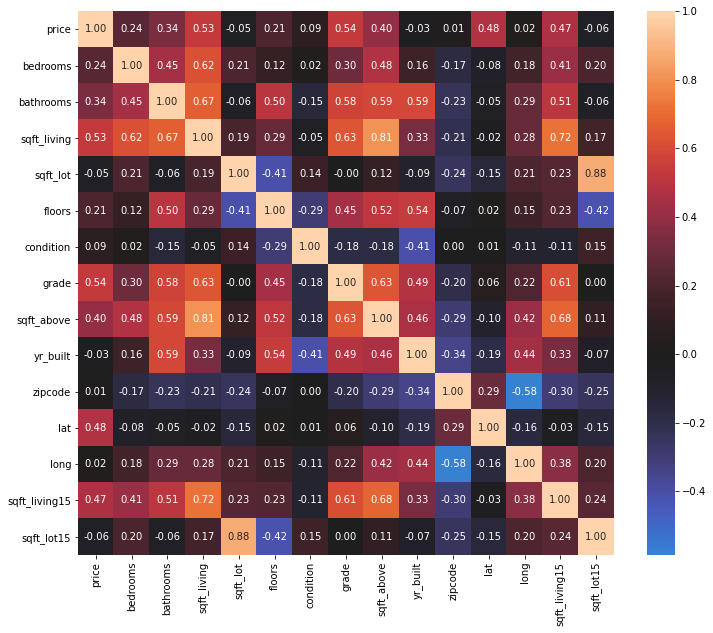

In [26]:
plt.figure(figsize=(12, 10))
sns.heatmap(corr, fmt='0.2f', center=0, annot=True);

2. Checking for Multicollinearity between the features without price.

In [27]:
feats = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 
          'condition', 'grade', 'sqft_above', 'yr_built', 'zipcode', 
         'lat', 'long', 'sqft_living15', 'sqft_lot15']
corr = housing_df[feats].corr()
corr

bedrooms  bathrooms  sqft_living  sqft_lot    floors  \
bedrooms       1.000000   0.453008     0.616470  0.210889  0.119970   
bathrooms      0.453008   1.000000     0.669293 -0.061998  0.503945   
sqft_living    0.616470   0.669293     1.000000  0.190936  0.287787   
sqft_lot       0.210889  -0.061998     0.190936  1.000000 -0.409277   
floors         0.119970   0.503945     0.287787 -0.409277  1.000000   
condition      0.022691  -0.150048    -0.053345  0.144755 -0.294635   
grade          0.299253   0.578764     0.628802 -0.001173  0.449765   
sqft_above     0.477979   0.586527     0.807693  0.120304  0.519390   
yr_built       0.156829   0.586336     0.328599 -0.093115  0.539520   
zipcode       -0.173961  -0.232211    -0.209233 -0.244479 -0.065023   
lat           -0.079850  -0.052932    -0.024487 -0.149191  0.018139   
long           0.180929   0.285168     0.283166  0.208497  0.148105   
sqft_living15  0.414216   0.508501     0.723701  0.226175  0.225622   
sqft_lot15     0.200019  -0.064012     0.174761  0.875903 -0.415845   

               condition     grade  sqft_above  yr_built   zipcode       lat  \
bedrooms        0.022691  0.299253    0.477979  0.156829 -0.173961 -0.079850   
bathrooms      -0.150048  0.578764    0.586527  0.586336 -0.232211 -0.052932   
sqft_living    -0.053345  0.628802    0.807693  0.328599 -0.209233 -0.024487   
sqft_lot        0.144755 -0.001173    0.120304 -0.093115 -0.244479 -0.149191   
floors         -0.294635  0.449765    0.519390  0.539520 -0.065023  0.018139   
condition       1.000000 -0.177917   -0.181758 -0.408582  0.002807  0.008341   
grade          -0.177917  1.000000    0.634134  0.488260 -0.198399  0.055319   
sqft_above     -0.181758  0.634134    1.000000  0.464872 -0.293783 -0.098315   
yr_built       -0.408582  0.488260    0.464872  1.000000 -0.344125 -0.191071   
zipcode         0.002807 -0.198399   -0.293783 -0.344125  1.000000  0.291670   
lat             0.008341  0.055319   -0.098315 -0.191071  0.291670  1.000000   
long           -0.107969  0.219503    0.417229  0.437545 -0.584802 -0.161758   
sqft_living15  -0.113458  0.610764    0.683337  0.329059 -0.297031 -0.033185   
sqft_lot15      0.154912  0.004754    0.105538 -0.074149 -0.250000 -0.148858   

                   long  sqft_living15  sqft_lot15  
bedrooms       0.180929       0.414216    0.200019  
bathrooms      0.285168       0.508501   -0.064012  
sqft_living    0.283166       0.723701    0.174761  
sqft_lot       0.208497       0.226175    0.875903  
floors         0.148105       0.225622   -0.415845  
condition     -0.107969      -0.113458    0.154912  
grade          0.219503       0.610764    0.004754  
sqft_above     0.417229       0.683337    0.105538  
yr_built       0.437545       0.329059   -0.074149  
zipcode       -0.584802      -0.297031   -0.250000  
lat           -0.161758      -0.033185   -0.148858  
long           1.000000       0.378031    0.204538  
sqft_living15  0.378031       1.000000    0.242110  
sqft_lot15     0.204538       0.242110    1.000000

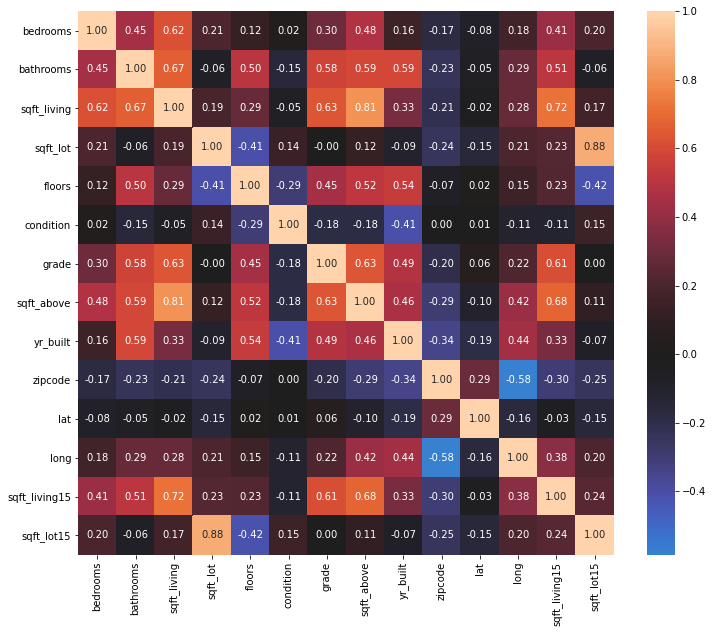

In [28]:
plt.figure(figsize=(12, 10))
sns.heatmap(corr, fmt='0.2f', center=0, annot=True);

I am now going to find the features that are related to each other and then remove them. You can also check this by looking at the heatmap that I created above but this is another way to check for multicollinearity. I am checking for features that have a correlation of 75% or more with each other, remove them, and then retest against price.

The features that should be removed are:
1. sqft_lot15
2. sqft_lot
3. sqft_above
4. sqft_living

In [29]:
df=housing_df.corr().abs().stack().reset_index().sort_values(0, ascending=False)

df['pairs'] = list(zip(df.level_0, df.level_1))

df.set_index(['pairs'], inplace = True)

df.drop(columns=['level_1', 'level_0'], inplace = True)

df.columns = ['cc']

df.drop_duplicates(inplace=True)

df[(df.cc>.75) & (df.cc <1)]

cc
pairs                              
(sqft_lot15, sqft_lot)     0.875903
(sqft_above, sqft_living)  0.807693

Now I am going to retest the features and price together without the above correlated features included. This will give us the true features that will affect price independently. 

In [30]:
feats = ['price', 'bedrooms', 'bathrooms', 'floors', 
         'condition', 'grade', 'yr_built', 'zipcode', 
         'lat', 'long']
corr = housing_df[feats].corr()
corr

price  bedrooms  bathrooms    floors  condition     grade  \
price      1.000000  0.243726   0.343146  0.207662   0.094748  0.535371   
bedrooms   0.243726  1.000000   0.453008  0.119970   0.022691  0.299253   
bathrooms  0.343146  0.453008   1.000000  0.503945  -0.150048  0.578764   
floors     0.207662  0.119970   0.503945  1.000000  -0.294635  0.449765   
condition  0.094748  0.022691  -0.150048 -0.294635   1.000000 -0.177917   
grade      0.535371  0.299253   0.578764  0.449765  -0.177917  1.000000   
yr_built  -0.032503  0.156829   0.586336  0.539520  -0.408582  0.488260   
zipcode    0.012115 -0.173961  -0.232211 -0.065023   0.002807 -0.198399   
lat        0.475261 -0.079850  -0.052932  0.018139   0.008341  0.055319   
long       0.023415  0.180929   0.285168  0.148105  -0.107969  0.219503   

           yr_built   zipcode       lat      long  
price     -0.032503  0.012115  0.475261  0.023415  
bedrooms   0.156829 -0.173961 -0.079850  0.180929  
bathrooms  0.586336 -0.232211 -0.052932  0.285168  
floors     0.539520 -0.065023  0.018139  0.148105  
condition -0.408582  0.002807  0.008341 -0.107969  
grade      0.488260 -0.198399  0.055319  0.219503  
yr_built   1.000000 -0.344125 -0.191071  0.437545  
zipcode   -0.344125  1.000000  0.291670 -0.584802  
lat       -0.191071  0.291670  1.000000 -0.161758  
long       0.437545 -0.584802 -0.161758  1.000000

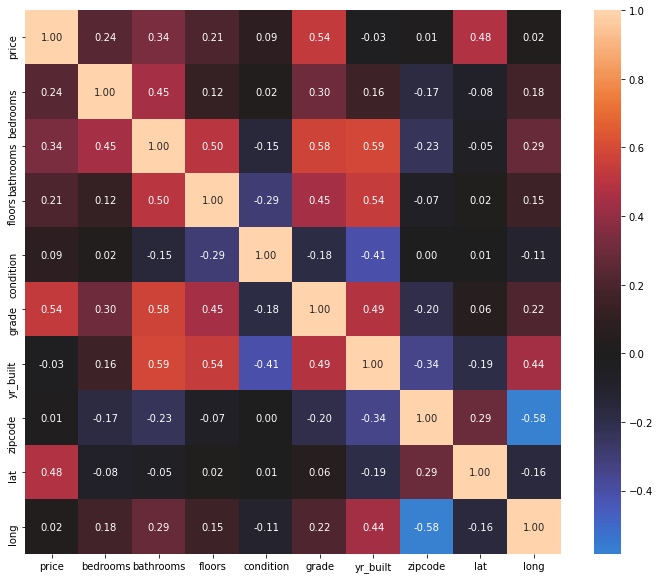

In [31]:
plt.figure(figsize=(12, 10))
sns.heatmap(corr, fmt='0.2f', center=0, annot=True);

## Checking for more correlation and linearity
I am going to run a few more EDA visuals to check correlation between price and the features by using joint plots and histograms. 

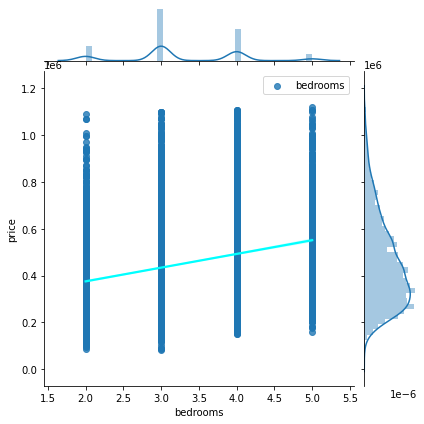

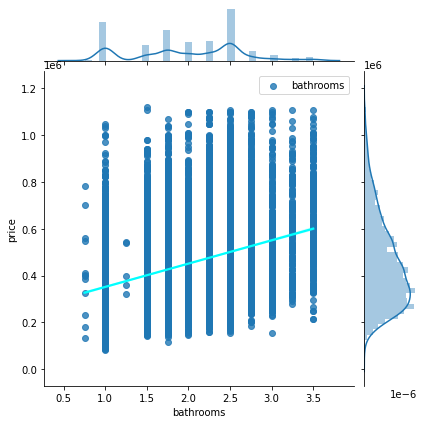

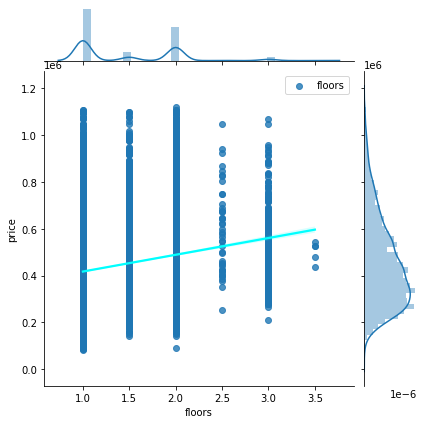

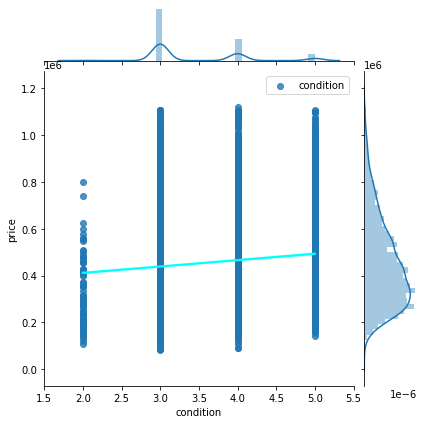

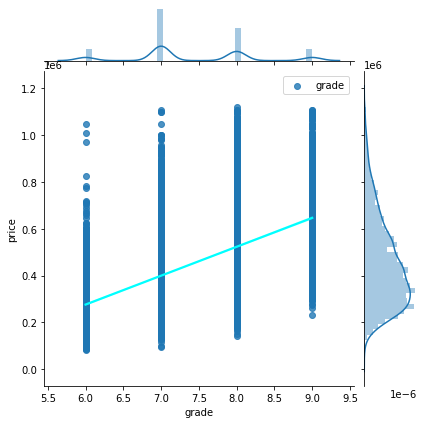

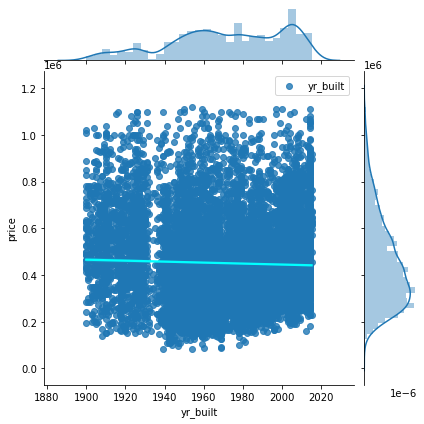

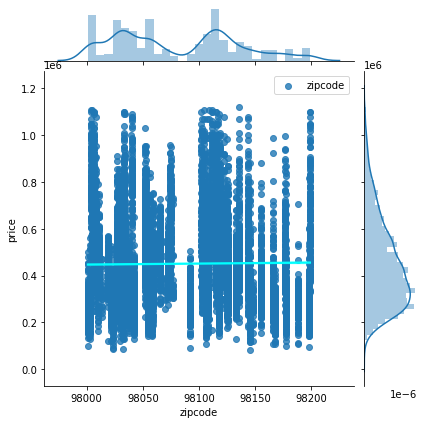

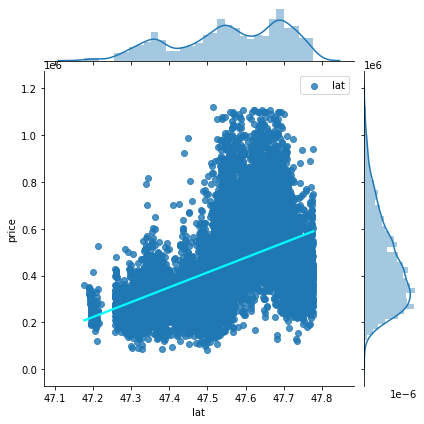

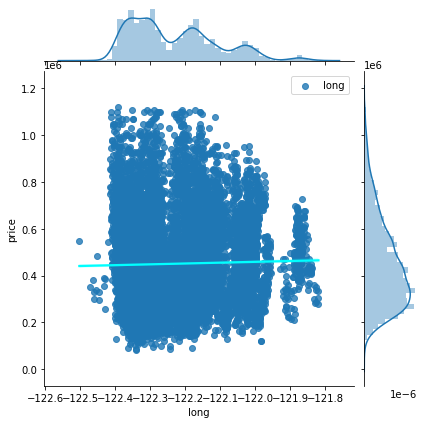

In [32]:
for column in ['bedrooms', 'bathrooms', 'floors', 
               'condition', 'grade', 'yr_built', 'zipcode', 
               'lat', 'long']:
    sns.jointplot(x = column, y ='price',
                  data = housing_df, 
                  kind = 'reg', 
                  label = column,
                  joint_kws = {'line_kws':{'color':'cyan'}})
    plt.legend()
    plt.show()

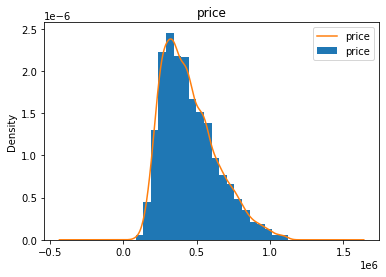

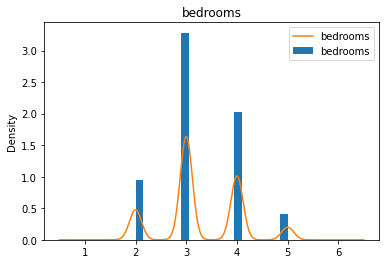

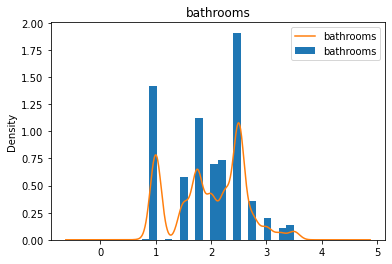

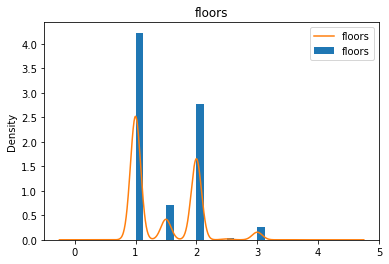

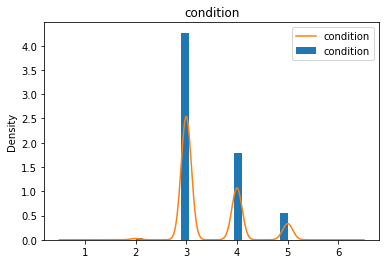

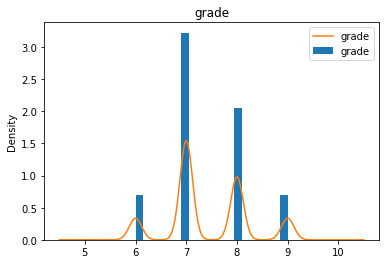

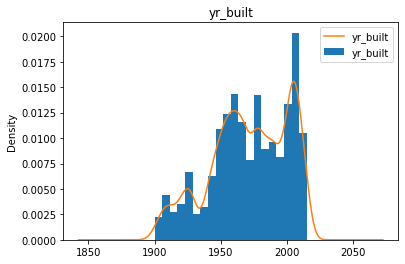

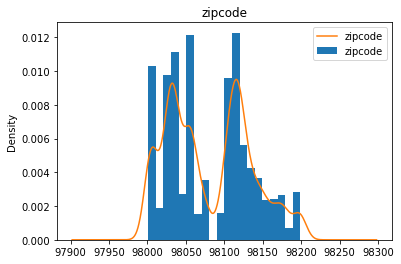

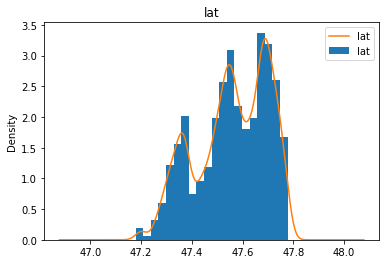

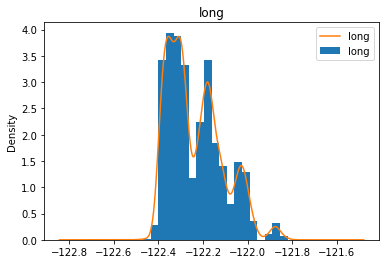

In [33]:
for column in ['price', 'bedrooms', 'bathrooms', 'floors', 
               'condition', 'grade', 'yr_built', 'zipcode', 
               'lat', 'long']:
    housing_df[column].plot.hist(density = True, bins = 20)
    housing_df[column].plot.kde(label = column)
    plt.title(column)
    plt.legend()
    plt.show()

## What effect does housing condition, year built, and zipcode have on home price?

I want to dive deeper into my data and see how condition, year built, and zipcode affects price in the Seattle. I am going to create a few visuals to see how they affect each other before I start my regression modeling.

I start by counting the total values in each feature just to see how they measure up. Then I created a geomap to see exactly where price and condition plot on a map of Seattle. Next I dive deeper into how the three features affect price by creating a few scatter plots.

In [34]:
h_condition = housing_df['condition'].value_counts()
print(h_condition)

3    7469
4    3141
5     982
2      77
Name: condition, dtype: int64


In [35]:
h_built = housing_df['yr_built'].value_counts()
print(h_built.head())

2014    314
2005    271
2003    254
2006    248
2004    246
Name: yr_built, dtype: int64


In [36]:
h_code = housing_df['zipcode'].value_counts()
print(h_code.head())

98103    371
98117    354
98034    351
98038    349
98115    349
Name: zipcode, dtype: int64


For my geomap, I used plotly and Mapbox to create this visual. You may have to create a mapbox token in order to recreate this visual in your notebook through Mapbox.com and then import that into Python.

In [37]:
import plotly.express as px
px.set_mapbox_access_token(open(".mapbox_token").read())
fig = px.scatter_mapbox(housing_df, lat="lat", lon="long",     color="price", size="condition",
                        color_continuous_scale=px.colors.cyclical.IceFire, size_max=15, zoom=10)
fig.show()

Next I created a scatter plot to see how year built, condition, and price correlates with each other. This visual shows us that homes between 1900 and 1980 have the highest condition ratings. They are holding their values very well. I wanted to know why so I did a little outside research on Seattle home prices and there is a shortage of homes in King County. The home owners are keeping their properties nicely renovated because the county is growing at a rapid rate. Seattle is the 5th most expensive city to live in and with the home shortage at 1 home to 1060 people, the home prices are surging. 

I also wanted to know if there was a specific zipcode that had the highest rated condition homes compared to price. The two zipcodes with the highest amount of 5 rated condition homes was in 98125 and 98101. These areas are located in downtown Seattle in waterfront properties and more specifically, Pikes Place Market. 

Text(0.5, 1.0, 'Price Compared by House Condition and Year Built')

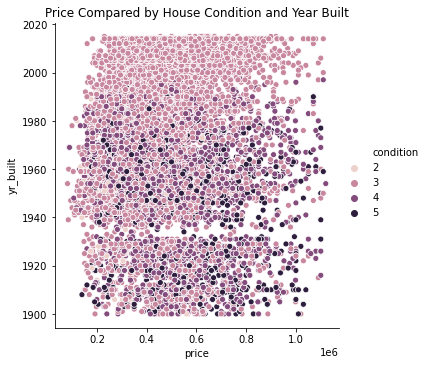

In [38]:
sns.relplot(x="price", y="yr_built", hue="condition", data=housing_df);
plt.title('Price Compared by House Condition and Year Built', fontsize = 12)

Text(0.5, 1.0, 'Price Compared by House Condition and Zipcode')

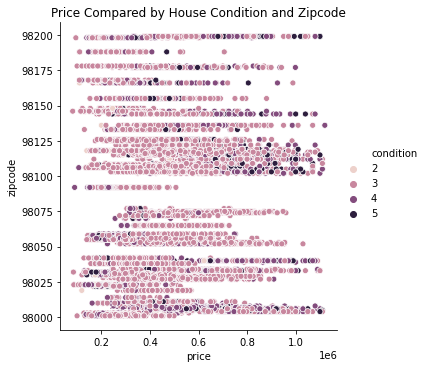

In [39]:
sns.relplot(x="price", y="zipcode", hue="condition", data=housing_df);
plt.title('Price Compared by House Condition and Zipcode', fontsize = 12)

## Regression Modeling

Now I am going to start my multiple linear regression modeling and creating a machine learning model as well. 

First I am going to create an initial assessment of the model to evaluate the p-values associated with each feature.

In [40]:
outcome = 'price'
x_cols = ['bedrooms', 'bathrooms', 'floors', 
         'condition', 'grade', 'yr_built', 'zipcode', 
         'lat', 'long', 'sqft_living15']

In [41]:
housing_df.columns = [col.replace(' ', '_') for col in housing_df.columns]
for col in x_cols:
    housing_df[col] = (housing_df[col] - housing_df[col].mean())/housing_df[col].std()
housing_df.head()

price  bedrooms  bathrooms  sqft_living  sqft_lot   floors  condition  \
0  604000  0.920792   1.556521         1960      5000 -0.85008   2.401926   
1  510000 -0.360630   0.011716         1680      8080 -0.85008  -0.659579   
2  257500 -0.360630   0.397917         1715      6819  0.98722  -0.659579   
3  229500 -0.360630  -1.533089         1780      7470 -0.85008  -0.659579   
4  323000 -0.360630   0.784118         1890      6560  0.98722  -0.659579   

      grade  sqft_above  yr_built  yr_renovated   zipcode       lat      long  \
0 -0.505822        1050 -0.208965             0  1.013699 -0.268348 -1.291232   
1  0.723085        1680  0.544435             0 -0.130887  0.414201  1.527681   
2 -0.505822        1715  0.818398             0 -1.441623 -1.769244 -0.756611   
3 -0.505822        1050 -0.380192             0  1.198310 -0.328782 -0.837614   
4 -0.505822        1890  1.092362             0 -0.795485 -1.351894  1.641085   

   sqft_living15  sqft_lot15  
0      -0.900931        5000  
1      -0.048996        7503  
2       0.799067        6819  
3      -0.087720        8113  
4       1.093371        7570

In [42]:
from statsmodels.formula.api import ols

In [43]:
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=housing_df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.628
Model:                            OLS   Adj. R-squared:                  0.627
Method:                 Least Squares   F-statistic:                     1966.
Date:                Tue, 23 Jun 2020   Prob (F-statistic):               0.00
Time:                        12:08:32   Log-Likelihood:            -1.5248e+05
No. Observations:               11669   AIC:                         3.050e+05
Df Residuals:                   11658   BIC:                         3.051e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      4.508e+05   1060.434    425.099      0.000    4.49e+05    4.53e+05
bedrooms       2885.7752   1253.942      2.301      0.021     427.838    5343.712
bathrooms       3.12e+04   1641.147     19.008      0.000     2.8e+04    3.44e+04
floors         1.786e+04   1371.915     13.019      0.000    1.52e+04    2.05e+04
condition      1.875e+04   1197.556     15.659      0.000    1.64e+04    2.11e+04
grade          7.519e+04   1565.718     48.022      0.000    7.21e+04    7.83e+04
yr_built      -6.532e+04   1699.123    -38.441      0.000   -6.86e+04    -6.2e+04
zipcode       -6515.8747   1377.918     -4.729      0.000   -9216.825   -3814.924
lat            7.698e+04   1143.625     67.315      0.000    7.47e+04    7.92e+04
long          -2618.4223   1424.463     -1.838      0.066   -5410.608     173.763
sqft_living15   4.68e+04   1508.006     31.032      0.000    4.38e+04    4.98e+04
==============================================================================
Omnibus:                     1130.916   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1978.363
Skew:                           0.681   Prob(JB):                         0.00
Kurtosis:                       4.488   Cond. No.                         3.89
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Next, I am going to check the p-values and remove any feature with a p-value over 0.05, which is the common cutoff for an acceptable value. I am going to remove bedrooms and longitude from the list of features and re-run my model. I am trying to improve the R-squared value. This technique allows you to manually test and train your model, which I like because you know exactly what is being changed because you initiate the changes and testing yourself. The test has diminished the model's performance slightly but it has also removed some multicollinearity.

In [44]:
outcome = 'price'
x_cols = ['bathrooms', 'floors', 'zipcode',
         'condition', 'grade', 'yr_built',
         'lat', 'sqft_living15']
         
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=housing_df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.627
Model:                            OLS   Adj. R-squared:                  0.627
Method:                 Least Squares   F-statistic:                     2455.
Date:                Tue, 23 Jun 2020   Prob (F-statistic):               0.00
Time:                        12:08:32   Log-Likelihood:            -1.5249e+05
No. Observations:               11669   AIC:                         3.050e+05
Df Residuals:                   11660   BIC:                         3.051e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      4.508e+05   1060.730    424.980      0.000    4.49e+05    4.53e+05
bathrooms      3.258e+04   1540.069     21.156      0.000    2.96e+04    3.56e+04
floors         1.773e+04   1369.544     12.946      0.000     1.5e+04    2.04e+04
zipcode       -5443.6090   1218.096     -4.469      0.000   -7831.282   -3055.936
condition      1.881e+04   1197.099     15.712      0.000    1.65e+04    2.12e+04
grade           7.56e+04   1550.604     48.756      0.000    7.26e+04    7.86e+04
yr_built      -6.663e+04   1623.684    -41.036      0.000   -6.98e+04   -6.34e+04
lat            7.667e+04   1138.764     67.323      0.000    7.44e+04    7.89e+04
sqft_living15  4.682e+04   1432.406     32.687      0.000     4.4e+04    4.96e+04
==============================================================================
Omnibus:                     1158.993   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2045.632
Skew:                           0.691   Prob(JB):                         0.00
Kurtosis:                       4.515   Cond. No.                         3.41
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Multicollinarity Part 2

I am going to test for vif (Variance Inflation Factor), to double check for any signs of multicollinearity. 

In [45]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [46]:
X = housing_df[x_cols]
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(x_cols, vif))

[('bathrooms', 2.10781962110114),
 ('floors', 1.6668810129348808),
 ('zipcode', 1.3186094031907474),
 ('condition', 1.2735407360308235),
 ('grade', 2.136755175056661),
 ('yr_built', 2.342911512313279),
 ('lat', 1.1524445283053166),
 ('sqft_living15', 1.8234135043607)]

vif with a value of 5 or greater means there is multicollinarity. Our data does not have any values of 5 or more, so I am going to move onto testing normality and keep all of the features in my model.

## Test for Normality

Next I am going to test for normal distributed data again and see if I can improve the linear distribution. I am going to do this by creating a Q-Q plot and also check for Homoscedasticity again. The red line represents a perfect linear relationship and the blue line represents my data. It's not too bad but I can tweek it a little and remove a few more price outliers because there is a little skewness to my model.

In [47]:
import statsmodels.api as sm
import scipy.stats as stats

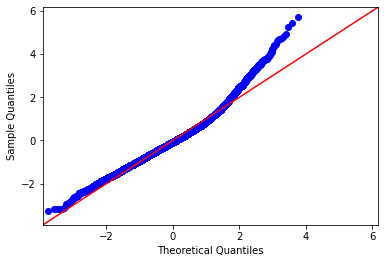

In [48]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

## Check for Homoscedasticity

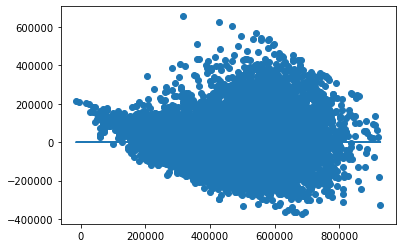

In [49]:
plt.scatter(model.predict(housing_df[x_cols]), model.resid)
plt.plot(model.predict(housing_df[x_cols]), [0 for i in range(len(housing_df))])

## Model Refinement

This is where I am going to see if I can improve the linear relationship in my model. I am going to remove a few outliers in the higher precentiles in price to improve the regression line and the skewness of my model. The range of an acceptable skewness of data is between -0.5 and 0.5. I got my model down from 0.691 to a 0.424 skewness. My R-Squared went down slightly again from 0.627 to a 0.624. An R-squared acceptable value is up to the Data Scientist, anything over 0.50 is good to work with but you definitely want it as high as possible. 

In [50]:
#Finding a cutoff point
for i in range(85, 100):
    q = i / 100
    print('{} percentile: {}'.format(q, housing_df['price'].quantile(q=q)))

0.85 percentile: 653000.0
0.86 percentile: 666776.3999999999
0.87 percentile: 678738.3999999999
0.88 percentile: 690500.0
0.89 percentile: 705000.0
0.9 percentile: 720000.0
0.91 percentile: 736440.0000000005
0.92 percentile: 750000.0
0.93 percentile: 770000.0
0.94 percentile: 790000.0
0.95 percentile: 810000.0
0.96 percentile: 840000.0
0.97 percentile: 875000.0
0.98 percentile: 923545.3999999992
0.99 percentile: 985000.0


In [51]:
subset = housing_df[housing_df['price'] < 875000]
print('Percent removed:',(len(housing_df) - len(subset))/len(housing_df))
outcome = 'price'
x_cols = ['bathrooms', 'floors', 'zipcode',
         'condition', 'grade', 'yr_built', 
         'lat', 'sqft_living15']
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=subset).fit()
model.summary()

Percent removed: 0.030508184077470222


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.624
Model:                            OLS   Adj. R-squared:                  0.624
Method:                 Least Squares   F-statistic:                     2343.
Date:                Tue, 23 Jun 2020   Prob (F-statistic):               0.00
Time:                        12:08:32   Log-Likelihood:            -1.4654e+05
No. Observations:               11313   AIC:                         2.931e+05
Df Residuals:                   11304   BIC:                         2.932e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      4.413e+05    962.321    458.550      0.000    4.39e+05    4.43e+05
bathrooms      2.944e+04   1409.746     20.885      0.000    2.67e+04    3.22e+04
floors         1.653e+04   1249.020     13.232      0.000    1.41e+04     1.9e+04
zipcode       -5263.2419   1106.170     -4.758      0.000   -7431.527   -3094.957
condition      1.577e+04   1090.826     14.456      0.000    1.36e+04    1.79e+04
grade          6.613e+04   1424.837     46.413      0.000    6.33e+04    6.89e+04
yr_built       -5.79e+04   1501.713    -38.559      0.000   -6.08e+04    -5.5e+04
lat             7.42e+04   1021.028     72.671      0.000    7.22e+04    7.62e+04
sqft_living15  4.178e+04   1324.173     31.553      0.000    3.92e+04    4.44e+04
==============================================================================
Omnibus:                      422.918   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              523.022
Skew:                           0.424   Prob(JB):                    2.67e-114
Kurtosis:                       3.624   Cond. No.                         3.47
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Rechecking Normality

I want to recheck my regression line one last time and this looks a lot better correlated.

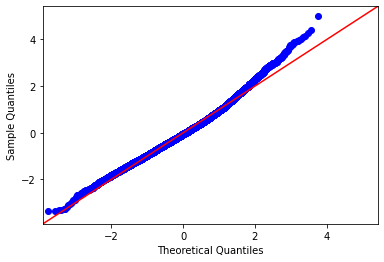

In [52]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

## Rechecking Homoscedasticity

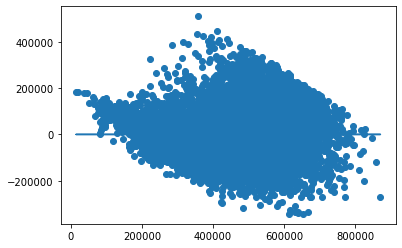

In [53]:
plt.scatter(model.predict(subset[x_cols]), model.resid)
plt.plot(model.predict(subset[x_cols]), [0 for i in range(len(subset))])

## Analysing OLS (Ordinary Least Squared) Between Price, Condition, Zip Code, and Year Built

I wanted to create a basic linear regression to check for regression assumptions with respect to the error terms. I compared condition, year built, and zipcode individually to price.

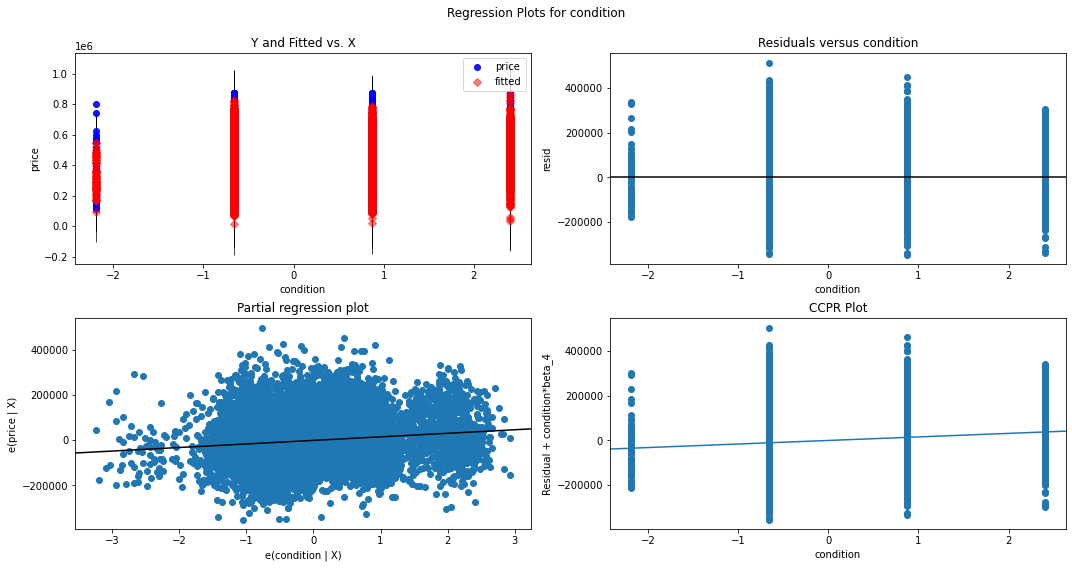

In [54]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "condition", fig=fig)
plt.show()

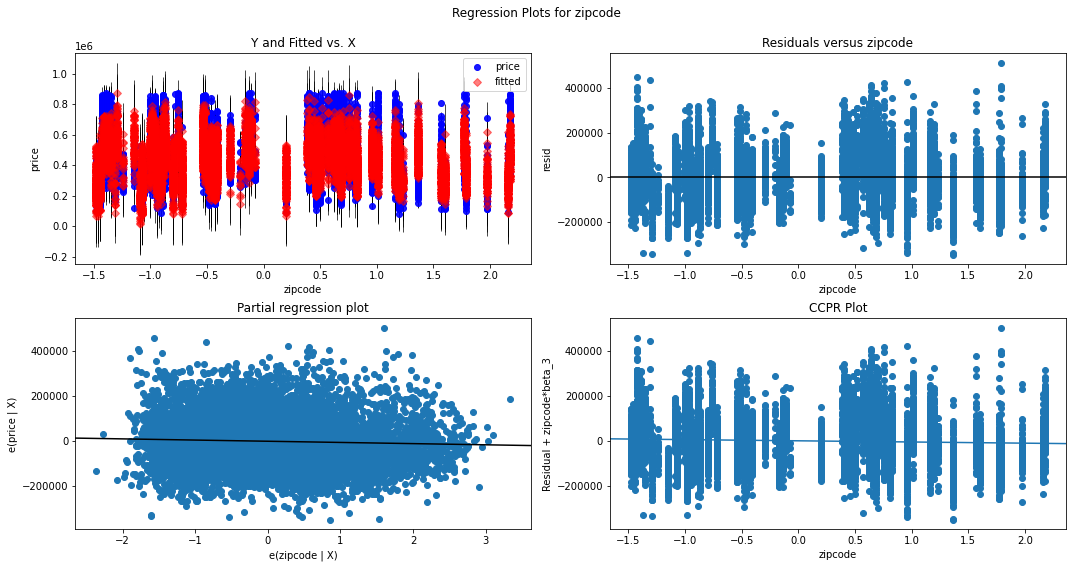

In [55]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "zipcode", fig=fig)
plt.show()

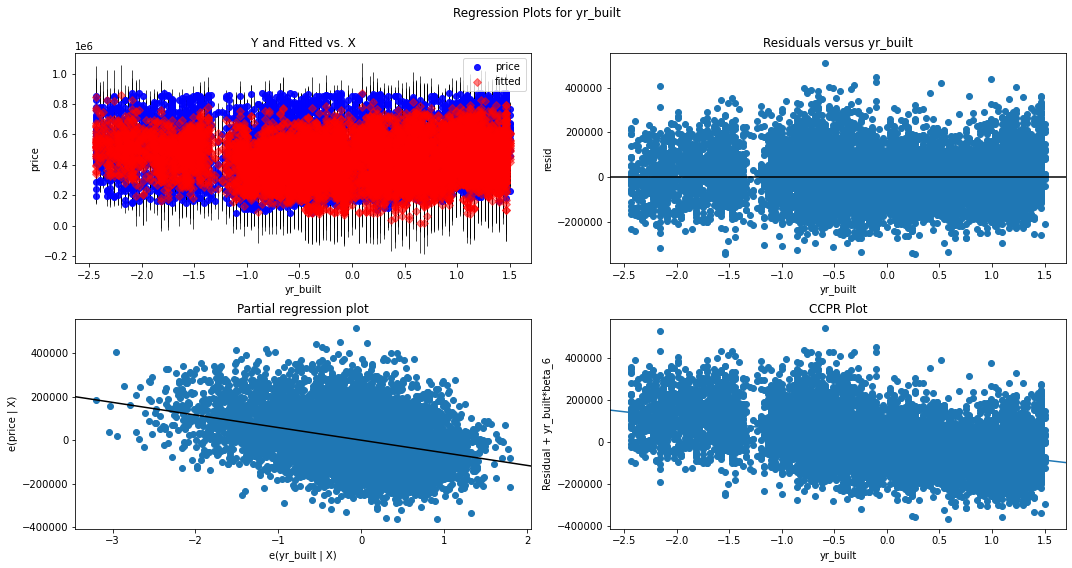

In [56]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "yr_built", fig=fig)
plt.show()

## Price Predictor based on Condition, Zipcode, and Year Built

Now I wanted to create a Price Predictor model to predict the sale price of a home in Seattle based on condition, zipcode, and year built. 

I am going to solve for the linear regression model and use reg.fit to train my model. The equation for the linear regression learning model is price= m1 * condition + m2 * zipcode + m3 * yr_built + b

1. m1, m2, m3 = coefficients
2. condition, zipcode, yr_built = independent variables 
3. price = dependent variables
4. b = intercept

Once I solve for all variables in the equation, I can then plug in values for condition, zipcode, and year built to get a predicted home price.

In [57]:
reg=linear_model.LinearRegression()
reg.fit(housing_df_out[['condition', 'zipcode', 'yr_built']],housing_df_out.price)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [58]:
reg.coef_

array([28890.11046834,    58.11466102,    92.28163679])

In [59]:
reg.intercept_

-5530175.221549497

This predictor solved for a home price of $436,008 with a 3 rated condition, 98003 zipcode, and built in 1995

In [60]:
reg.predict([[3,98003,1995]])

array([436008.09939273])

This predictor solved for a home price of $498,653 with a 5 rated condition, 98101 zipcode, and built in 1986

In [61]:
reg.predict([[5,98101,1986]])

array([498653.0223784])

## Recommendations

* Based on my findings, I recommend that older homes should be purchased between the years 1900 and 1980 due to the fact that these homes possess the highest home condition ratings and they seem to hold their value the most. Renovations definitely needs to be kept current in order to keep the property values high, but these homes will hold their value and are great investments due to the high demand of living in King County and the scarce homes available on the market to be sold. There is 1 home available for every 1060 people in the Seattle area. 


* The homes with the highest conditions and prices are located in zipcodes 98125 and 98101 which is more specifically, Pikes Place Market in Downtown Seattle. Purchasing homes in these zip codes will also provide very high investment returns due to their high populatity and demand. Seattle is the 5th most sought after city to reside in the United States. 

## Conclusion
* For my multiple linear regression modeling, my data outcomes started off with a R2 of 0.628 and ended at 0.624. The R2 outcome will fit between the values of 0 and 1 with 0 representing a model that does not explain any of the variation in the response variable around its mean and 1 representing a model that explains all of the variation in the response variable around its mean. Even though my R2 went down by 0.004, my multicollinearity was also reduced and created a more accurate regression line and correlation to home price.


* I also looked at skewness to determine just how normal my data was being represented. I started off with a 0.681 skewness level and got it down to a 0.424. The skewness level in the original model was a little too high. The range should be between -0.5 and 0.5 values. With me hitting my final skewness level at 0.424, I got into the ideal range. 


* There were are few more questions that were answered with this project that are located on different github links. I will have those listed on my README page on my github so you can take a look at those other questions as well. 


* Future work for this project that I want to get done will also be listed on my README page on ym github as well. 